<a href="https://colab.research.google.com/github/Firizki17/PSD/blob/main/Tugas1_MuhFirizki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUGAS MUH FIRIZKI 2226270024
---
Lakukan pemrosesan gambar dengan menggunakan teknik downsampling, kuantisasi, dan shrinking. Anda akan menganalisis perbedaan yang terjadi pada gambar setelah dilakukan setiap proses, serta membandingkan data piksel dari gambar asli dan hasil pemrosesan.

In [1]:
import urllib.request
urllib.request.urlretrieve(
'https://pemrogramanmatlab.com/wp-content/uploads/2017/07/citra-grayscale2.jpg',
"gfg.png")

('gfg.png', <http.client.HTTPMessage at 0x7f90d7f25150>)

Resolusi gambar: 512x512 piksel


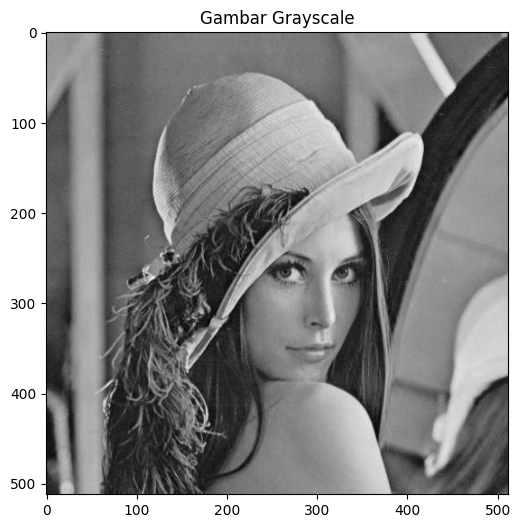

In [2]:
import cv2 # https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html
import matplotlib.pyplot as plt
import numpy as np

# Membaca gambar
image = cv2.imread('gfg.png', cv2.IMREAD_GRAYSCALE)

# Dapatkan resolusi gambar dalam piksel
width, height = image.shape
print(f"Resolusi gambar: {width}x{height} piksel")

# Menampilkan gambar
plt.figure(figsize=(6,6))
plt.imshow(image, cmap='gray')
plt.title("Gambar Grayscale")
plt.show()

In [3]:
# representasi data gambar
print('gambar matrik', len(image[:75]),'piksel')
print (image[:75])

gambar matrik 75 piksel
[[162 161 160 ... 171 154 129]
 [162 162 161 ... 173 158 133]
 [163 162 161 ... 171 155 128]
 ...
 [172 170 170 ...  28  61  98]
 [174 172 171 ...  54  90 125]
 [176 174 172 ...  83 119 148]]


In [4]:
# simpan data gambar ke file txt
pixel_data = np.array(image)
# Menyimpan array 2D dalam file teks
np.savetxt('image_data.txt', pixel_data, fmt='%d')

2D ke 1D

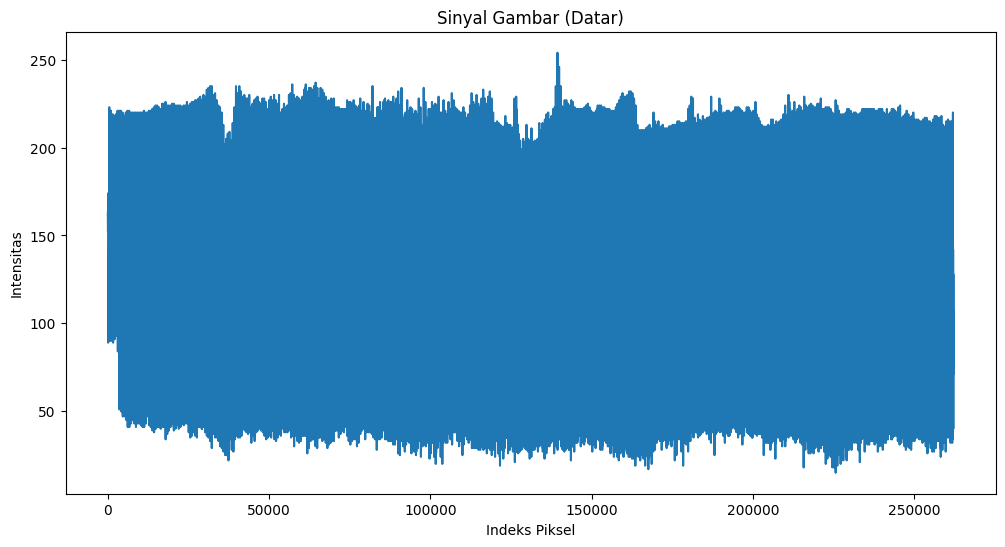

In [6]:
# Jika ingin melihat sinyal dari seluruh gambar (2D sinyal)
signal_2d = image.flatten()  # Mengubah gambar menjadi vektor 1D --> ref : https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html

# # Menentukan nilai xlabel berdasarkan indeks piksel
# num_pixels = signal_2d.shape[0]  # Total jumlah piksel setelah diflatten

plt.figure(figsize=(12, 6))
plt.plot(signal_2d)
plt.title('Sinyal Gambar (Datar)')
plt.xlabel('Indeks Piksel') # karena di flatten maka indexs pixel menjadi height×width
plt.ylabel('Intensitas')
plt.show()

3D

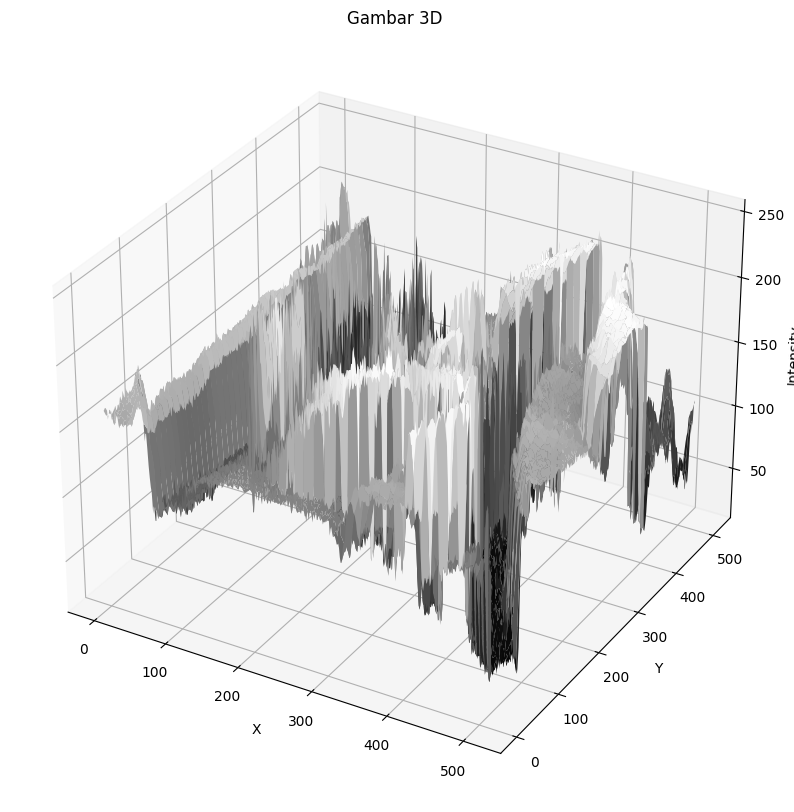

In [7]:
# 3D plotting -- https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter12.02-3D-Plotting.html
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#create 3d plot
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

# image data
x = np.arange(image.shape[1]) # x-coordinate (kolom)
y = np.arange(image.shape[0]) # y-coordinate (baris)
X, Y = np.meshgrid(x, y) # The meshgrid function has the inputs x and y are lists containing the independent data set.

# Plot the image data
ax.plot_surface(X, Y, image, cmap='gray')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.set_title('Gambar 3D')
plt.show()

**DOWNSAMPLING**

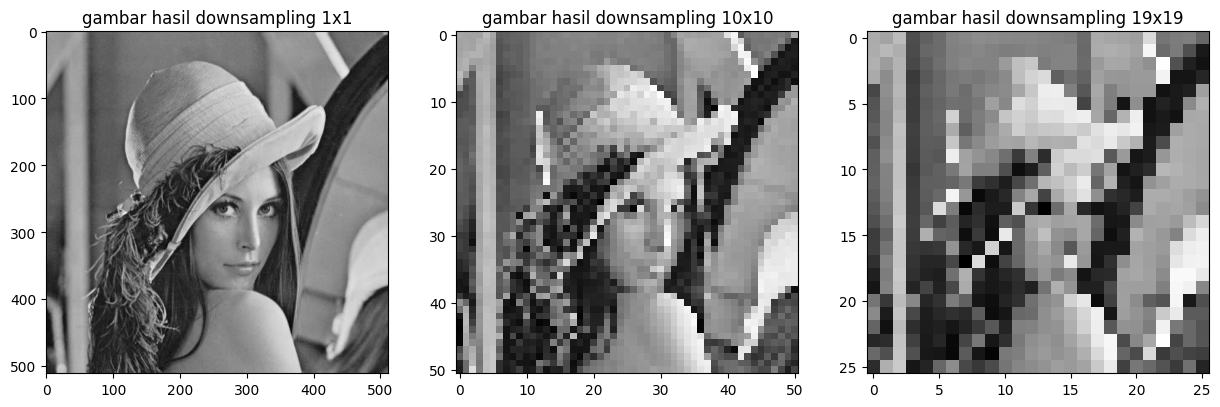

In [9]:
# Proses Downsampling
factors = [1,10,19]

figure,axis = plt.subplots(1, len(factors), figsize=(15,5))

for factor, ax in zip(factors, axis):
    new_size = (image.shape[1]//factor, image.shape[0]//factor)
    downsampled_image = cv2.resize(image, new_size)
    ax.imshow(downsampled_image, cmap='gray')
    ax.set_title(f'gambar hasil downsampling {factor}x{factor}')
plt.show()

**UPSAMPLING**

image size for factor 3 (1536, 1536)
image size for factor 9 (4608, 4608)
image size for factor 27 (13824, 13824)


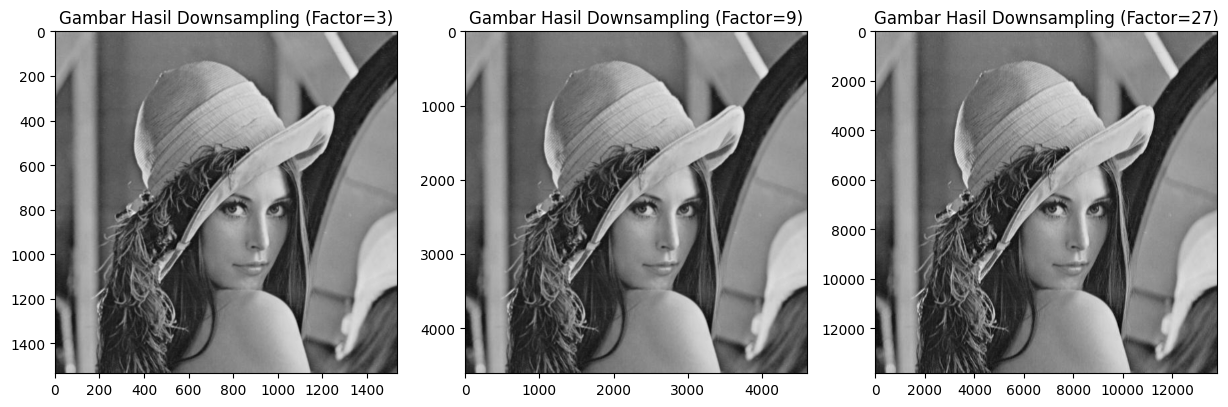

In [10]:
# Proses Upsampling
factors = 3**np.arange(1,4)

figure,axis = plt.subplots(1,len(factors),figsize=(15,5))
for factor, ax in zip(factors,axis):
    new_size = (image.shape[1] * factor, image.shape[0] * factor) # process upsampling
    upsampled_image = cv2.resize(image, new_size)
    ax.imshow(upsampled_image, cmap='gray')
    ax.set_title(f'Gambar Hasil Downsampling (Factor={factor})')
    print(f'image size for factor {factor}', upsampled_image.shape)
plt.show()

**KUANTISASI**

gambar hasil quantization 2 (512, 512)
gambar hasil quantization 4 (512, 512)
gambar hasil quantization 8 (512, 512)
gambar hasil quantization 16 (512, 512)


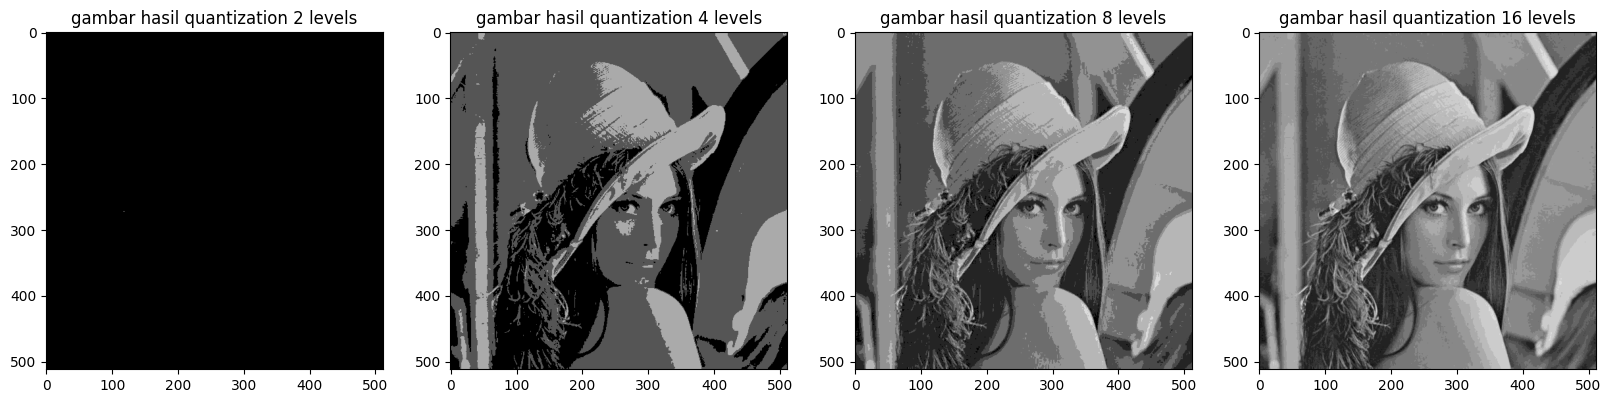

In [12]:
# Membuat faktor kuantisasi
factors = 2**np.arange(1, 5)

figure,axis = plt.subplots(1, len(factors), figsize=(20,6))

for idx, (k, ax) in enumerate(zip(factors, axis)):
  bins = np.linspace(0, image.max(), k)
  quantized_image = np.digitize(image, bins) -1
  reconstructed_image = bins[quantized_image]
  ax.imshow(quantized_image, cmap='gray')
  ax.set_title(f'gambar hasil quantization {k} levels')
  print(f'gambar hasil quantization {k}',quantized_image.shape)
plt.show()

**RESIZE**

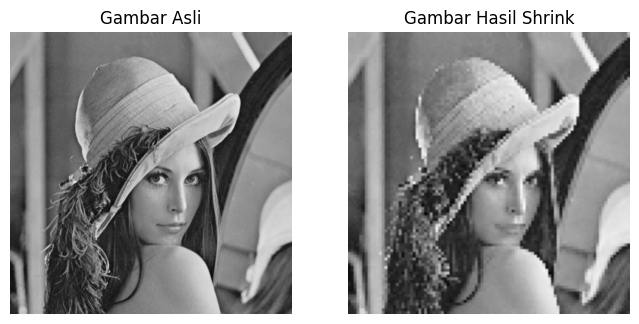

In [13]:
# shrink an image
size = (100, 100)
shrink_image = cv2.resize(image, size, interpolation=cv2.INTER_NEAREST)
plt.figure(figsize=(8,4))
# Subplot for original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis('off')

# Subplot for shrinked image
plt.subplot(1, 2, 2)
plt.imshow(shrink_image, cmap='gray')
plt.title("Gambar Hasil Shrink")
plt.axis('off')

plt.show()

In [14]:
# Membandingkan data piksel
print("Original Image Shape: ", image.shape)
print("Shrink Image Shape: ", shrink_image.shape)

# Jika ingin melihat beberapa piksel untuk perbandingan, ambil subset data
original_pixels = image[:10, :10]  # Ambil 5x5 bagian atas dari gambar asli
shrink_pixels = shrink_image[:10, :10]  # Ambil 5x5 bagian atas dari gambar shrink

print("\nData Piksel Gambar Asli (10x10 bagian):\n", original_pixels)
print("\nData Piksel Gambar Hasil Shrink (10x10 bagian):\n", shrink_pixels)

Original Image Shape:  (512, 512)
Shrink Image Shape:  (100, 100)

Data Piksel Gambar Asli (10x10 bagian):
 [[162 161 160 159 159 159 159 160 164 164]
 [162 162 161 160 159 159 160 160 164 164]
 [163 162 161 160 160 160 161 161 164 165]
 [163 163 162 161 160 160 161 161 164 165]
 [163 162 161 160 160 160 160 161 163 164]
 [162 161 160 159 159 159 159 160 162 162]
 [161 160 159 158 158 158 158 158 160 161]
 [160 159 158 157 157 157 157 158 159 160]
 [153 155 158 160 161 161 159 158 162 159]
 [155 156 158 159 158 157 155 153 162 158]]

Data Piksel Gambar Hasil Shrink (10x10 bagian):
 [[162 159 161 155 155 156 156 160 166 172]
 [162 159 160 153 156 155 155 156 166 172]
 [156 153 157 157 156 153 153 159 169 170]
 [158 155 154 158 156 154 158 164 169 167]
 [156 156 157 158 157 154 161 166 165 163]
 [157 154 159 158 156 156 166 167 163 159]
 [158 159 159 158 160 164 169 167 160 158]
 [163 157 159 162 163 166 167 166 158 160]
 [166 162 162 166 170 166 164 160 156 162]
 [164 162 162 170 160 15

# **ANALISIS **
1. Grayscale Image Visualization :
* Gambar Asli: Setelah gambar diunduh dan diubah menjadi citra grayscale,
intensitas warna diwakili oleh level grayscale (0-255) di setiap piksel. Gambar ini terdiri dari matriks 2D yang mewakili intensitas piksel.
* Visualisasi: Gambar divisualisasikan secara keseluruhan, dan data piksel yang
ditampilkan menunjukkan intensitas piksel di setiap posisi.

2. Sinyal 1D dari Gambar
* Flattening: Ketika gambar diubah menjadi sinyal 1D (flatten), gambar 2D diubah menjadi vektor 1D. Setiap nilai dalam vektor tersebut adalah intensitas piksel dari gambar. Plot sinyal menunjukkan fluktuasi intensitas berdasarkan urutan piksel.
* Pengamatan: Sinyal ini berguna untuk analisis lebih lanjut, seperti deteksi tepi atau analisis spektral. Hasil plot sinyal 1D menunjukkan variasi intensitas gambar yang sesuai dengan detail visual gambar.

3. 3D Visualization of Image Data
* Visualisasi 3D: Menggunakan koordinat (X, Y) sebagai sumbu horizontal dan intensitas piksel sebagai sumbu vertikal (Z), hasil plot 3D memberikan gambaran topografi dari intensitas gambar. Puncak dan lembah pada gambar 3D menunjukkan perubahan intensitas yang signifikan pada gambar asli.
* Pengamatan: Gambar yang lebih detail memiliki fluktuasi lebih tajam dalam intensitas.

4. Downsampling
* Proses: Downsampling dilakukan dengan mengurangi resolusi gambar. Ini berarti bahwa beberapa piksel diabaikan, menghasilkan gambar yang lebih kecil dan kurang detail.
* Hasil: Gambar yang dihasilkan menjadi lebih kabur dan kehilangan detail saat faktor downsampling meningkat. Misalnya, downsampling dengan faktor 19x membuat gambar sangat tidak jelas karena banyak informasi visual hilang.
* Perbandingan Piksel: Ukuran gambar berkurang drastis, sehingga informasi intensitas piksel menjadi sangat sederhana.

5. Upsampling
* Proses: Upsampling dilakukan dengan memperbesar gambar, tetapi tanpa menambah informasi baru. Algoritma interpolasi hanya memperkirakan nilai-nilai piksel di antara data asli.
* Hasil: Gambar menjadi lebih besar tetapi terlihat pixelated (terdiri dari blok-blok besar piksel), terutama untuk faktor pembesaran yang lebih tinggi.
Pengamatan: Tidak ada informasi visual baru yang ditambahkan selama proses ini; hanya ukuran gambar yang bertambah.

6. Quantization (Kuantisasi)
* Proses: Quantization mengurangi jumlah level intensitas piksel, yaitu dari skala 256 level grayscale ke beberapa level yang lebih kecil (misalnya, 2, 4, 8 level).
* Hasil: Pada quantization dengan level rendah (misalnya 2 atau 4 level), gambar menjadi sangat kasar, dan banyak detail halus hilang. Sementara pada level yang lebih tinggi (misalnya 16), gambar masih mempertahankan beberapa detail.
* Perbandingan Piksel: Dalam proses quantization, semakin rendah level quantization, semakin banyak piksel yang memiliki intensitas yang sama, menghasilkan gambar yang lebih datar dan kasar.

7. Shrink (Resize)
* Proses: Shrinking dilakukan dengan memperkecil gambar menggunakan interpolasi terdekat (INTER_NEAREST), yang menghasilkan gambar baru dengan ukuran yang lebih kecil (100x100 piksel).
* Hasil: Gambar yang diperkecil tetap mempertahankan pola keseluruhan, tetapi banyak detail hilang karena banyak piksel digabungkan menjadi satu.
* Perbandingan Piksel :
 1. Gambar Asli (10x10 bagian):
    [128 128 128 128 127 127 127 128 129 128]
 [128 128 128 127 127 128 128 128 128 129]
 [128 127 127 127 128 128 128 127 127 127]
 [128 127 128 128 128 127 128 128 127 127]
 [128 128 128 128 128 128 127 127 127 127]
 [127 127 128 128 128 128 127 128 128 128]
 [127 127 127 128 128 127 128 128 127 128]
 [127 127 128 127 127 127 128 128 128 128]
 [127 128 128 128 127 127 128 127 127 128]
 [128 128 128 127 127 128 128 128 127 127]
 2. Gambar Shrink (10x10 bagian) :
  [128 127 127 127 128 128 128 128 128 127]
 [127 127 127 127 128 127 127 127 127 128]
 [127 128 127 128 127 128 127 127 128 127]
 [128 127 127 128 128 128 128 127 128 128]
 [127 127 128 128 127 128 128 128 127 128]
 [128 127 128 128 128 128 127 127 128 127]
 [127 128 127 127 127 127 128 127 127 128]
 [128 127 128 128 127 128 128 127 127 127]
 [127 128 127 127 127 127 128 127 128 128]
 [127 127 127 128 127 127 128 128 127 127]
* Pengamatan: Gambar hasil shrink memiliki pola piksel yang mirip tetapi lebih sederhana, karena resolusi yang lebih rendah mengakibatkan beberapa informasi visual hilang. Ukuran gambar asli adalah (300x300 piksel), sementara gambar hasil shrink menjadi (100x100 piksel).

---
Kesimpulan Umum:

Setiap proses menghasilkan perubahan pada gambar, baik dari segi ukuran, detail, atau kualitas visual:
1. Downsampling menyebabkan hilangnya detail karena pengurangan resolusi.
2. Upsampling memperbesar gambar tetapi menyebabkan gambar terlihat kasar tanpa menambah informasi.
3. Quantization mengurangi jumlah level intensitas piksel, menyebabkan gambar menjadi lebih kasar dengan level quantization rendah.
4. Shrink memperkecil gambar sambil mempertahankan pola umum, tetapi kehilangan detail akibat penggabungan piksel.

Perbedaan piksel antara gambar asli dan hasil pemrosesan dapat dilihat dalam jumlah detail dan variasi intensitas yang berkurang.



